In [5]:
import sys
import os
os.chdir(r'/home/root1/sarthak/ThinkStats/ThinkStats2-master/code/')
import nsfg
import numpy as np
df = nsfg.ReadFemPreg()

In [6]:
df['birthwgt_lb'].values

array([ 8.,  7.,  9., ..., nan,  7.,  7.])

### Plotting Histograms in Matplotlib

In [7]:
from matplotlib import pyplot as plt

([<matplotlib.axis.XTick at 0x7f0de841c390>,
 <a list of 14 Text xticklabel objects>)

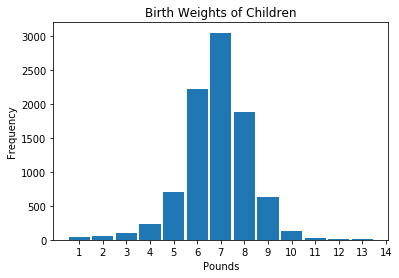

In [8]:
live = df[df.outcome == 1]
plt.hist(live['birthwgt_lb'].values, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],align = 'left', rwidth=0.9)
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.title('Birth Weights of Children')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

###  Mode = 7
Normal distribution, but not true normal distribution since the tail extends farther to the left than the right and hence is not symmetric. 

/home/root1/sarthak/global/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/root1/sarthak/global/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


([<matplotlib.axis.XTick at 0x7f0de797a8d0>,
 <a list of 15 Text xticklabel objects>)

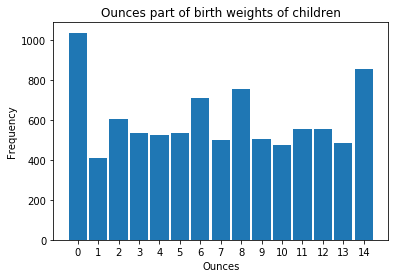

In [9]:

plt.hist(live['birthwgt_oz'].values, align = 'left', rwidth=0.9, bins = 15)
plt.xlabel('Ounces')
plt.ylabel('Frequency')
plt.title('Ounces part of birth weights of children')
plt.xticks([i for i in range(0,15)])

In theory we expect this distribution to be uniform; that is, all
values should have the same frequency. In fact, 0 is more common than the
other values, and 1 and 15 are less common, probably because respondents
round o birth weights that are close to an integer value.

Text(0.5, 1.0, "Mother's Age at the end of pregnancy")

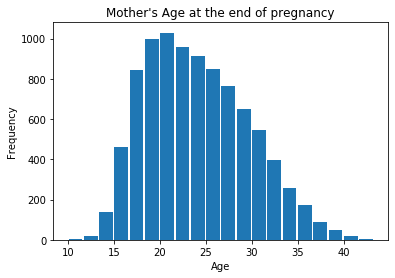

In [10]:

plt.hist(live['agepreg'].values, align = 'left', rwidth=0.9, bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Mother's Age at the end of pregnancy")
# plt.xticks([i for i in range(0,50)])

The mode is 21 years. The distribution is very roughly bell-
shaped, but in this case the tail extends farther to the right than left; most
mothers are in their 20s, fewer in their 30s.

Text(0.5, 1.0, 'Histogram of pregnancy length in weeks.')

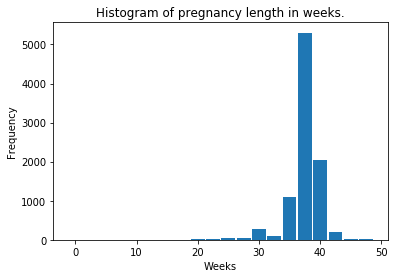

In [11]:
plt.hist(live['prglngth'].values, align = 'left', rwidth=0.9, bins = 20)
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.title("Histogram of pregnancy length in weeks.")
# plt.xticks([i for i in range(0,50)])

By far the most common value is 39 weeks. The left tail is longer
than the right; early babies are common, but pregnancies seldom go past 43
weeks, and doctors often intervene if they do.

In [12]:
from collections import Counter
sorted(Counter(live['prglngth']).items() , reverse=True, key=lambda x: x[0])

[(50, 2),
 (48, 7),
 (47, 1),
 (46, 1),
 (45, 10),
 (44, 46),
 (43, 148),
 (42, 328),
 (41, 587),
 (40, 1116),
 (39, 4693),
 (38, 607),
 (37, 455),
 (36, 321),
 (35, 311),
 (34, 60),
 (33, 49),
 (32, 115),
 (31, 27),
 (30, 138),
 (29, 21),
 (28, 32),
 (27, 3),
 (26, 35),
 (25, 3),
 (24, 13),
 (23, 1),
 (22, 7),
 (21, 2),
 (20, 1),
 (19, 1),
 (18, 1),
 (17, 2),
 (13, 1),
 (9, 1),
 (4, 1),
 (0, 1)]

##  First Babies v/s Others

In [13]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [14]:
firsts_l = firsts.prglngth.values
others_l = others.prglngth.values

In [15]:
len(firsts_l),len(others_l)

(4413, 4735)

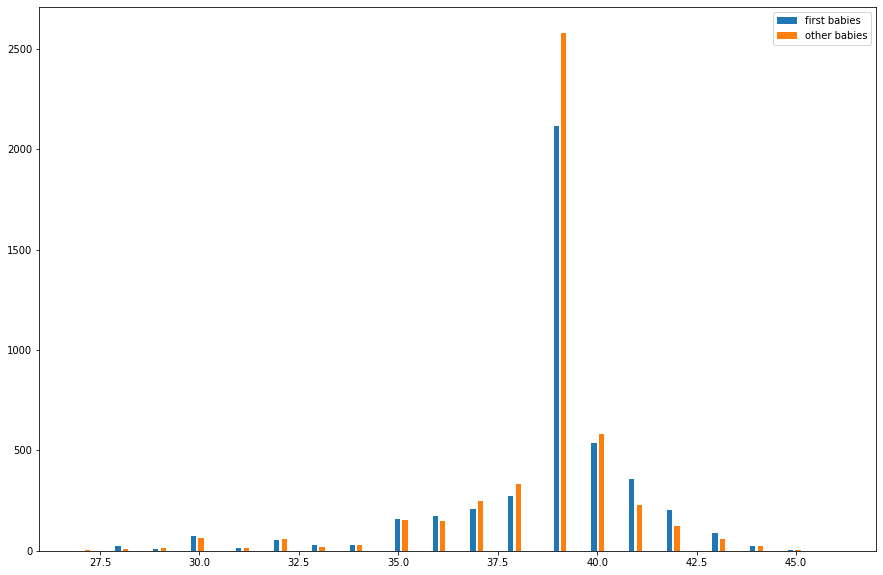

In [35]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
figure(figsize=(15,10))
plt.hist(firsts_l, rwidth=0.7,bins = 100,label = 'first babies',align='left', range = (27,46))
plt.hist(others_l, rwidth=0.7,bins = 100,label = 'other babies',align='right',range = (27,46))
pyplot.legend(loc='upper right')

In [19]:
# Calculating summary statistics using Pandas
mean = live.prglngth.mean()
variance = live.prglngth.var()
std = live.prglngth.std()
mean,variance,std

(38.56055968517709, 7.302662067826817, 2.702343810070587)

## Measuring Effect Size

In [20]:
# By difference in mean

In [21]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [22]:
av_pg_l = live.prglngth.mean()
av_pg_l

38.56055968517709

In [23]:
(firsts.prglngth.mean() - others.prglngth.mean())/av_pg_l*100

0.20237586646738304

0.2% difference as compared to a typical prg length

### Effect Size using Cohen's d

In [24]:
import math
def cohen_d(array1, array2):
    mean_difference = array1.mean() - array2.mean()
    var1, var2 = array1.var(), array2.var()
    n1 = len(array1)
    n2 = len(array2)
    pooled_variation = (n1*var1 + n2*var2)/(n1+n2)
    d = mean_difference/(math.sqrt(pooled_variation))
    return d

In [25]:
cohen_d(firsts.prglngth, others.prglngth)

0.028879044654449834

####  0.028 std deviations is a very small effect size
    Small effect = 0.2
    Medium Effect = 0.5
    Large Effect = 0.8


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [28]:
firsts.totalwgt_lb.mean()-others.totalwgt_lb.mean()

-0.12476118453549034

First babies are lighter by 0.12 lb on average

In [29]:
avg_lb = live.totalwgt_lb.mean()
avg_lb

7.265628457623368

In [30]:
(firsts.totalwgt_lb.mean()-others.totalwgt_lb.mean())/avg_lb*100

-1.7171423678372415

1.717% difference as compared to avg baby weight

In [31]:
#cohen's d
cohen_d(firsts.totalwgt_lb,others.totalwgt_lb)

-0.08867292707260174

0.08 std deviations

In [32]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

([<matplotlib.axis.XTick at 0x7f0de2043ba8>,
 <a list of 15 Text xticklabel objects>)

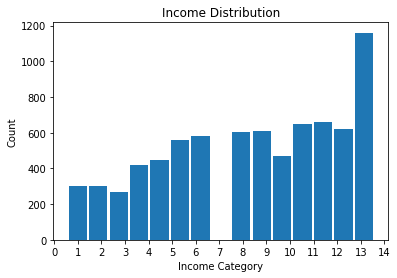

In [44]:
plt.hist(resp.totincr,bins = 15, rwidth=0.9, align='left')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.xticks([i for i in range(0,15)])

Make a histogram of age_r, the respondent's age at the time of interview.

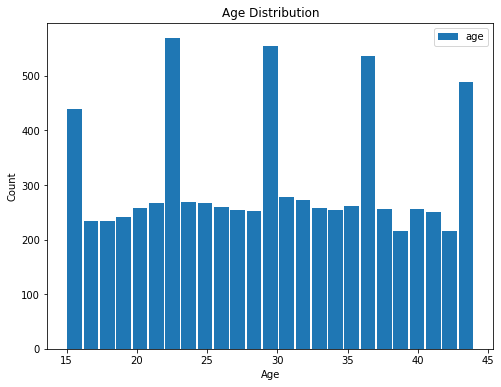

In [53]:
figure(figsize=(8,6))
plt.hist(resp.age_r,bins=25,rwidth=0.9,label='age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend(loc='upper right')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

(array([ 942.,    0., 1716.,    0.,    0., 1826.,    0., 1740.,    0.,
           0.,  906.,    0.,  313.,    0.,    0.,  118.,    0.,   78.,
           0.,    4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <a list of 20 Patch objects>)

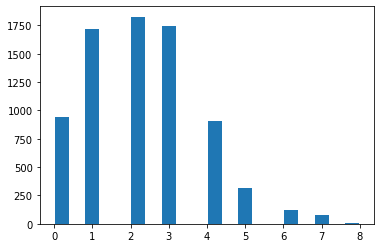

In [56]:
plt.hist(resp.numfmhh,bins= 20,rwidth=0.9)

Make a histogram of parity, the number of children borne by the respondent. How would you describe this distribution?

(array([4.749e+03, 1.603e+03, 8.280e+02, 3.090e+02, 9.500e+01, 2.900e+01,
        1.500e+01, 8.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ,
        12.1, 13.2, 14.3, 15.4, 16.5, 17.6, 18.7, 19.8, 20.9, 22. ]),
 <a list of 20 Patch objects>)

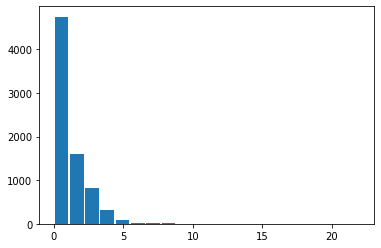

In [60]:
plt.hist(resp.parity,bins=20,rwidth=0.9)

The distributions is skewed towards the right

In [64]:
Counter(resp.parity.values).most_common()

[(0, 3230),
 (2, 1603),
 (1, 1519),
 (3, 828),
 (4, 309),
 (5, 95),
 (6, 29),
 (7, 15),
 (8, 8),
 (10, 3),
 (9, 2),
 (22, 1),
 (16, 1)]

Compare the mean parity for high income respondents and others.

In [81]:
# Calculating Average Parity for each Income group
inc_avg_parity = {}
for value in sorted(set(resp.totincr.values)):
    avg_parity = -1
    parities = resp[resp.totincr==value].parity.values
    inc_avg_parity[value] = parities.mean()

In [82]:
inc_avg_parity

{1: 1.2876254180602007,
 2: 1.5016611295681064,
 3: 1.5037593984962405,
 4: 1.5581947743467934,
 5: 1.3730337078651684,
 6: 1.5348837209302326,
 7: 1.3550600343053174,
 8: 1.1897689768976898,
 9: 1.1317957166392092,
 10: 1.1132478632478633,
 11: 1.1066460587326121,
 12: 1.041033434650456,
 13: 0.9935794542536116,
 14: 1.0758620689655172}

<BarContainer object of 14 artists>

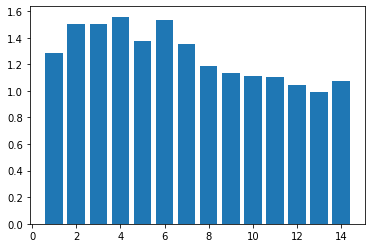

In [89]:
plt.bar(inc_avg_parity.keys(),inc_avg_parity.values())

In [91]:
rich = resp[resp.totinc == 14]
not_rich = resp[resp.totinc <14]
rich.parity.mean(), not_rich.parity.mean()

(1.0831858407079646, 1.2910079891211967)

In [92]:
cohen_d(rich.parity,not_rich.parity)

-0.14996919777839163

Small effect = 0.2
Medium Effect = 0.5
Large Effect = 0.8